In [1]:

import sys
%matplotlib inline

from data_models.parameters import arl_path

results_dir = arl_path('test_results')

import numpy

from astropy.coordinates import SkyCoord
from astropy import units as u

from matplotlib import pyplot as plt

from data_models.polarisation import PolarisationFrame
from data_models.memory_data_models import Skycomponent, SkyModel

from wrappers.serial.visibility.base import create_blockvisibility
from wrappers.serial.image.operations import show_image, qa_image
from wrappers.serial.simulation.testing_support import create_named_configuration, simulate_pointingtable
from wrappers.serial.imaging.primary_beams import create_vp, create_pb
from wrappers.serial.skycomponent.operations import apply_beam_to_skycomponent
from wrappers.serial.imaging.base import create_image_from_visibility, advise_wide_field
from processing_components.calibration.pointing import create_pointingtable_from_blockvisibility
from processing_components.simulation.pointing import create_gaintable_from_pointingtable
from wrappers.arlexecute.visibility.base import copy_visibility


from wrappers.arlexecute.visibility.coalesce import convert_blockvisibility_to_visibility

from workflows.arlexecute.skymodel.skymodel_arlexecute import predict_skymodel_list_arlexecute_workflow
from workflows.arlexecute.imaging.imaging_arlexecute import invert_list_arlexecute_workflow

from wrappers.arlexecute.execution_support.arlexecute import arlexecute

import logging
log = logging.getLogger()
log.setLevel(logging.DEBUG)
log.addHandler(logging.StreamHandler(sys.stdout))


backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
arlexecute.set_client(use_dask=True)

Using selector: KqueueSelector
Using selector: KqueueSelector


In [3]:
nfreqwin = 1
ntimes = 100
rmax = 1e3

frequency = [15e9]
channel_bandwidth = [4e9]
times = numpy.linspace(-numpy.pi / 4.0, numpy.pi / 4.0, ntimes)

phasecentre = SkyCoord(ra=+15.0 * u.deg, dec=-45.0 * u.deg, frame='icrs', equinox='J2000')
midcore = create_named_configuration('MIDR5', rmax=rmax)

block_vis = create_blockvisibility(midcore, times, frequency=frequency,
                                   channel_bandwidth=channel_bandwidth, weight=1.0, phasecentre=phasecentre,
                                   polarisation_frame=PolarisationFrame("stokesI"), zerow=True)


create_configuration_from_file: Maximum radius 1000.0 m includes 114 antennas/stations
create_blockvisibility: 100 rows, 0.068 GB


In [4]:
wprojection_planes=1
vis = convert_blockvisibility_to_visibility(block_vis)
advice=advise_wide_field(vis, guard_band_image=5.0, delA=0.02, 
                         wprojection_planes=wprojection_planes)

vis_slices = advice['vis_slices']
npixel=4096
cellsize=advice['cellsize']
pb_cellsize=2.0*advice['primary_beam_fov']/npixel

convert_visibility: Original 100 rows, 0.068 GB, converted 644100 rows, 0.067 GB
advise_wide_field: Maximum wavelength 0.020 (meters)
advise_wide_field: Minimum wavelength 0.020 (meters)
advise_wide_field: Maximum baseline 85326.6 (wavelengths)
advise_wide_field: Station/antenna diameter 13.5 (meters)
advise_wide_field: Primary beam 0.001480 (rad) 0.085 (deg)
advise_wide_field: Image field of view 0.007402 (rad) 0.424 (deg)
advise_wide_field: Synthesized beam 0.000012 (rad) 0.001 (deg)
advise_wide_field: Cellsize 0.000004 (rad) 0.000 (deg)
advice_wide_field: Npixels per side = 1895
advice_wide_field: Npixels (power of 2) per side = 2048
advice_wide_field: Npixels (power of 2, 3) per side = 2048
advice_wide_field: W sampling for full image = 1161.8 (wavelengths)
advice_wide_field: W sampling for primary beam = 29046.2 (wavelengths)
advice_wide_field: Time sampling for full image = 374.5 (s)
advice_wide_field: Time sampling for primary beam = 9362.0 (s)
advice_wide_field: Frequency sampl

In [5]:
from matplotlib import pylab

pylab.rcParams['figure.figsize'] = (12.0, 12.0)
pylab.rcParams['image.cmap'] = 'rainbow'
doplot=False

create_image_from_visibility: Parsing parameters to get definition of WCS
create_image_from_visibility: Defining single channel Image at <SkyCoord (ICRS): (ra, dec) in deg
    (15., -45.)>, starting frequency 15000000000.0 Hz, and bandwidth 3999999999.96 Hz
create_image_from_visibility: uvmax = 48563.475605 wavelengths
create_image_from_visibility: Critical cellsize = 0.000010 radians, 0.000590 degrees
create_image_from_visibility: Cellsize          = 0.000001 radians, 0.000041 degrees
create_image_from_visibility: Parsing parameters to get definition of WCS
create_image_from_visibility: Defining single channel Image at <SkyCoord (ICRS): (ra, dec) in deg
    (15., -45.)>, starting frequency 15000000000.0 Hz, and bandwidth 3999999999.96 Hz
create_image_from_visibility: uvmax = 48563.475605 wavelengths
create_image_from_visibility: Critical cellsize = 0.000010 radians, 0.000590 degrees
create_image_from_visibility: Cellsize          = 0.000004 radians, 0.000224 degrees
simulate_pointingt

/Users/timcornwell/anaconda/envs/arlenv/lib/python3.6/site-packages/distributed/worker.py:901: UserWarning: Large object of size 155.61 MB detected in task graph: 
  (<data_models.memory_data_models.Visibility object ... b039e80>, None)
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  % (format_bytes(len(b)), s))


findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/timcornwell/anaconda/envs/arlenv/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXGeneral ('/Users/timcornwell/anaconda/envs/arlenv/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf') with score of 0.050000
findfont: Matching :family=STIXGeneral:style=italic:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXGeneral ('/Users/timcornwell/anaconda/envs/arlenv/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf') with score of 0.050000
findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=bold:stretch=normal:size=10.0 to STIXGeneral ('/Users/timcornwell/anaconda/envs/arlenv/lib/python3.6/site-packages/matplotlib/mpl-data/f

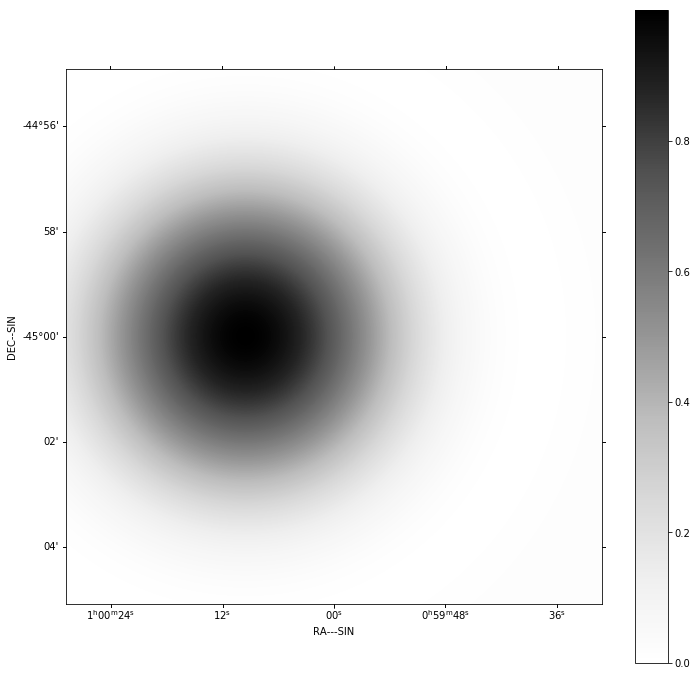

In [6]:
original_component = [Skycomponent(flux=[[1.0]], direction=phasecentre, 
                                  frequency=frequency, polarisation_frame=PolarisationFrame('stokesI'))]
vp = create_image_from_visibility(block_vis, npixel=npixel, frequency=frequency,
                                    nchan=nfreqwin, cellsize=pb_cellsize, phasecentre=phasecentre)
model = create_image_from_visibility(block_vis, npixel=512, frequency=frequency,
                                    nchan=nfreqwin, cellsize=cellsize, phasecentre=phasecentre)
offset = [0.595/(frequency[0]*1e-9), 0.0]
pb_direction = SkyCoord(ra=(+15.0 + offset[0]) * u.deg, 
                        dec=(-45.0 + offset[1]) * u.deg, frame='icrs', equinox='J2000')
pb = create_pb(vp, 'MID', pointingcentre=pb_direction)
show_image(pb)
    
vp = create_vp(vp, 'MID', pointingcentre=pb_direction)
pt = create_pointingtable_from_blockvisibility(block_vis, vp)

no_error_pt = simulate_pointingtable(pt, 0.0, 0.0, seed=18051955)
no_error_gt = create_gaintable_from_pointingtable(block_vis, original_component, no_error_pt, vp)

no_error_sm=SkyModel(components=original_component, gaintable=no_error_gt[0])
no_error_vis = copy_visibility(vis)
no_error_vis = predict_skymodel_list_arlexecute_workflow(no_error_vis, [no_error_sm], context='2d', docal=True)
no_error_vis=arlexecute.compute(no_error_vis, sync=True)[0]


In [7]:
print(numpy.average(no_error_vis.vis))
# (0.7097375619376883+0j)

(0.7097319541862815+0j)


Generate the model from the GLEAM catalog, including application of the primary beam.

simulate_pointingtable: Simulating pointing error = 4.84814e-06 (rad), static pointing error = 0 (rad)
Quality assessment:
	Origin: qa_image
	Context: 
	Data:
		shape: '(1, 1, 256, 256)'
		max: '7.51823636910178e-06'
		min: '-6.97782224553773e-05'
		maxabs: '6.97782224553773e-05'
		rms: '3.1391573763061502e-06'
		sum: '-0.009658359352481133'
		medianabs: '1.2961768359195488e-06'
		median: '1.1384099260691291e-07'



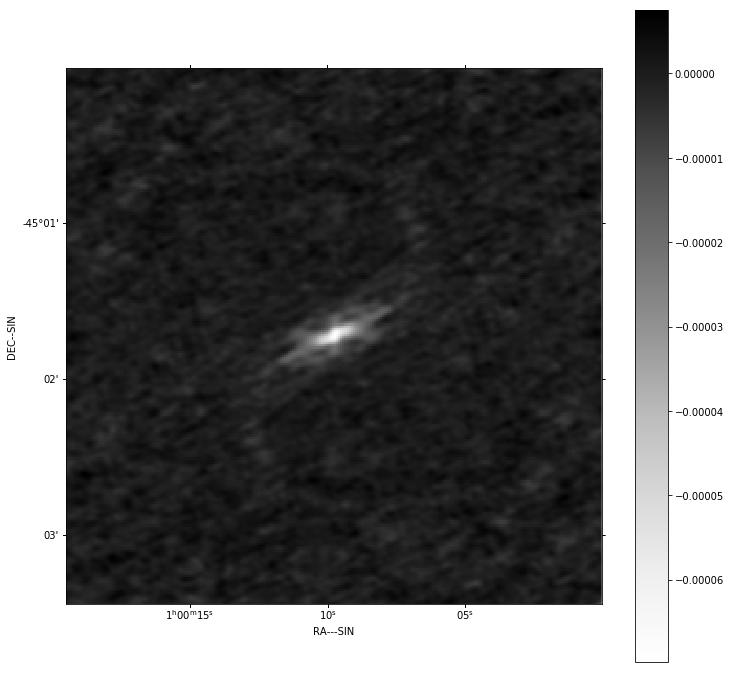

simulate_pointingtable: Simulating pointing error = 9.69627e-06 (rad), static pointing error = 0 (rad)
Quality assessment:
	Origin: qa_image
	Context: 
	Data:
		shape: '(1, 1, 256, 256)'
		max: '1.5190303332308131e-05'
		min: '-0.00020729193296987816'
		maxabs: '0.00020729193296987816'
		rms: '7.5327067084731925e-06'
		sum: '-0.0205439812652027'
		medianabs: '2.617853325430951e-06'
		median: '3.5058974946017167e-07'



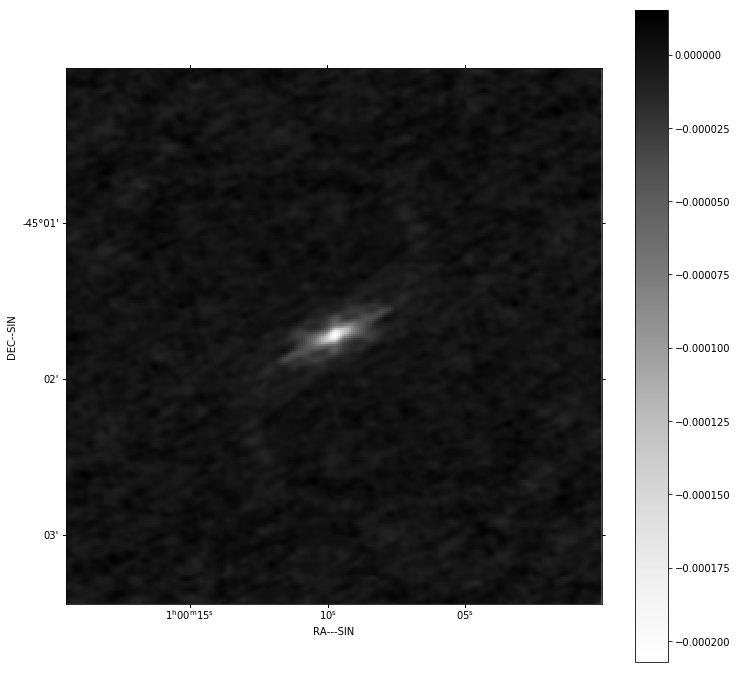

simulate_pointingtable: Simulating pointing error = 1.93925e-05 (rad), static pointing error = 0 (rad)
Quality assessment:
	Origin: qa_image
	Context: 
	Data:
		shape: '(1, 1, 256, 256)'
		max: '3.09854539852076e-05'
		min: '-0.0006853319443689546'
		maxabs: '0.0006853319443689546'
		rms: '2.0640902597230097e-05'
		sum: '-0.045986891204410976'
		medianabs: '5.416787269340395e-06'
		median: '1.2136678379634085e-06'



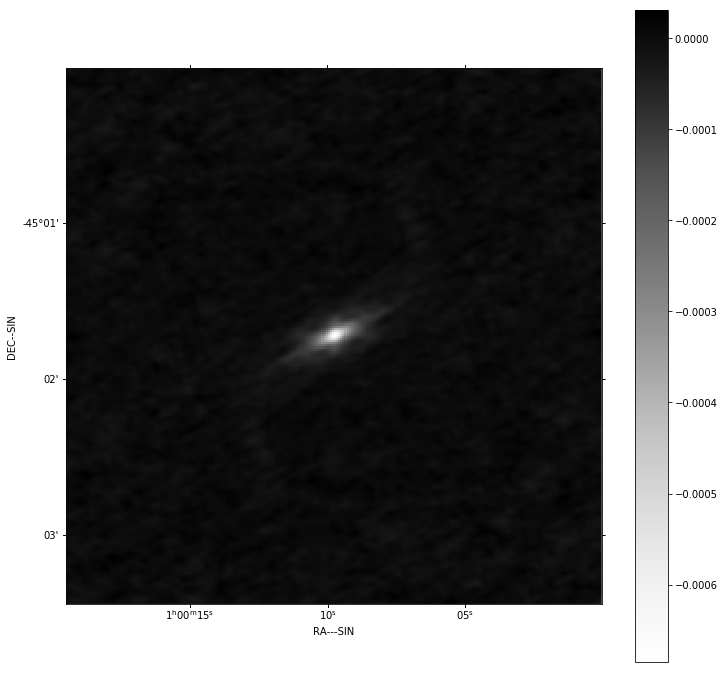

simulate_pointingtable: Simulating pointing error = 3.87851e-05 (rad), static pointing error = 0 (rad)
Quality assessment:
	Origin: qa_image
	Context: 
	Data:
		shape: '(1, 1, 256, 256)'
		max: '6.430453478714165e-05'
		min: '-0.0024507728445311654'
		maxabs: '0.0024507728445311654'
		rms: '6.524605191358997e-05'
		sum: '-0.11146812012787026'
		medianabs: '1.1901795240957217e-05'
		median: '4.462005380634507e-06'



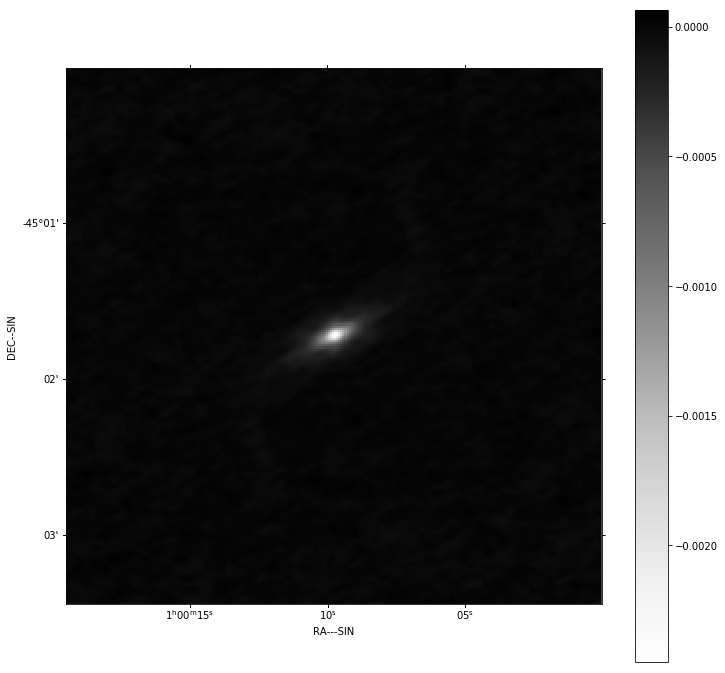

simulate_pointingtable: Simulating pointing error = 7.75702e-05 (rad), static pointing error = 0 (rad)
Quality assessment:
	Origin: qa_image
	Context: 
	Data:
		shape: '(1, 1, 256, 256)'
		max: '0.00013723031924078703'
		min: '-0.009177822422022586'
		maxabs: '0.009177822422022586'
		rms: '0.00022888359527125529'
		sum: '-0.29978242694408513'
		medianabs: '2.940189343686123e-05'
		median: '1.6815383793968056e-05'



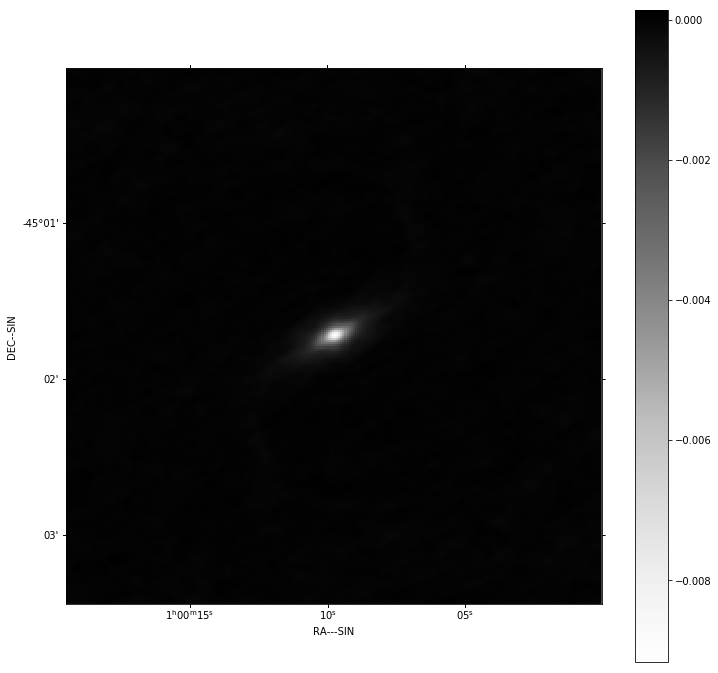

simulate_pointingtable: Simulating pointing error = 0.00015514 (rad), static pointing error = 0 (rad)
Quality assessment:
	Origin: qa_image
	Context: 
	Data:
		shape: '(1, 1, 256, 256)'
		max: '0.00032162940911288217'
		min: '-0.03478408385383258'
		maxabs: '0.03478408385383258'
		rms: '0.0008406911722625782'
		sum: '-0.893044442526701'
		medianabs: '8.558573984930872e-05'
		median: '6.161642381479653e-05'



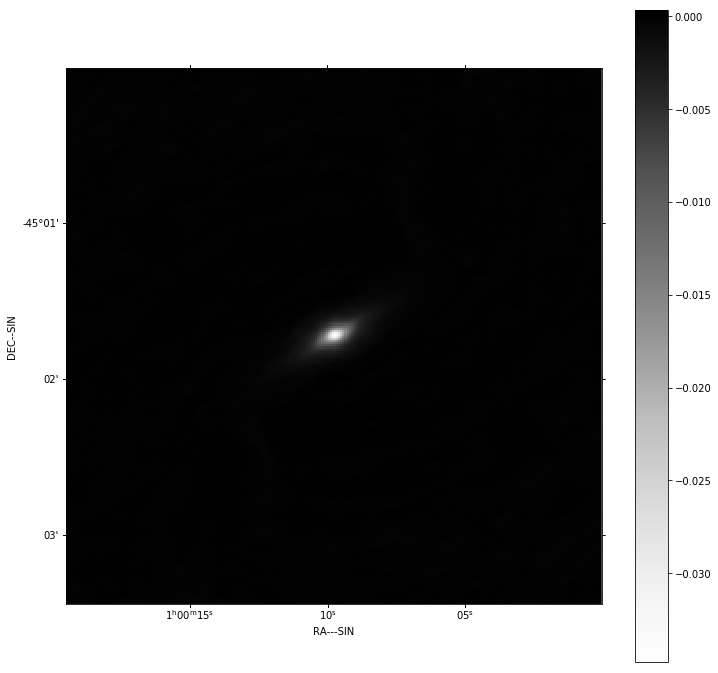

simulate_pointingtable: Simulating pointing error = 0.000310281 (rad), static pointing error = 0 (rad)
Quality assessment:
	Origin: qa_image
	Context: 
	Data:
		shape: '(1, 1, 256, 256)'
		max: '0.0010023062046994782'
		min: '-0.1255207651444167'
		maxabs: '0.1255207651444167'
		rms: '0.0029894699532099288'
		sum: '-2.783079182812216'
		medianabs: '0.00027274499215492213'
		median: '0.0002157068126563833'



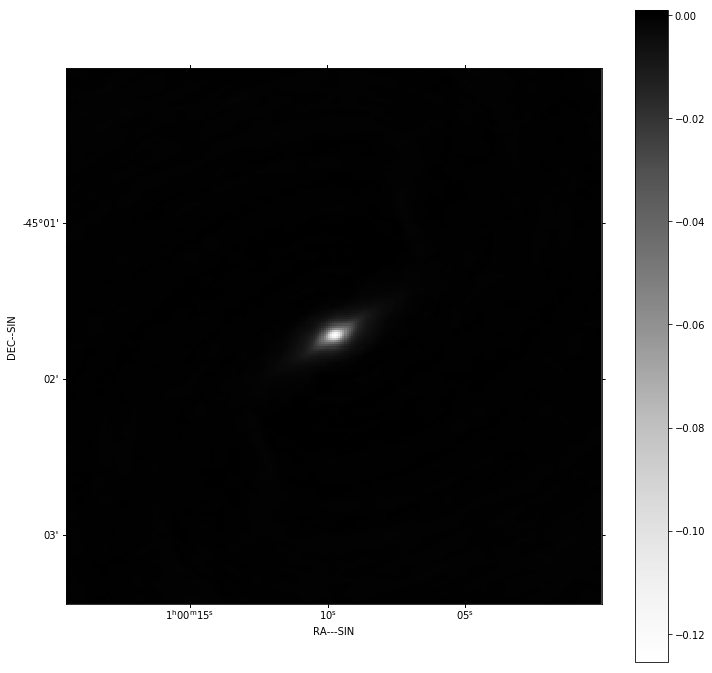

simulate_pointingtable: Simulating pointing error = 0.000620562 (rad), static pointing error = 0 (rad)
Quality assessment:
	Origin: qa_image
	Context: 
	Data:
		shape: '(1, 1, 256, 256)'
		max: '0.002696222838186258'
		min: '-0.36428072127411654'
		maxabs: '0.36428072127411654'
		rms: '0.008618112944136074'
		sum: '-7.595500873381419'
		medianabs: '0.000757334109988889'
		median: '0.0006271463106173816'



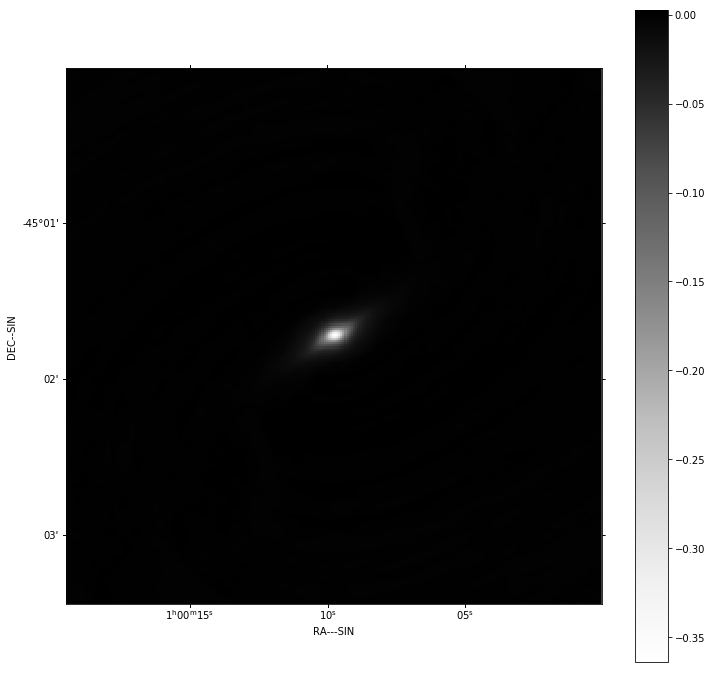

In [8]:

static=0.0
dynamic=1.0
fwhm = 1.0
pes = [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0]
qas = []
for pe in pes:
    static_pointing_error = static * pe * numpy.pi/(3600.0*180.0)
    pointing_error = dynamic * pe * numpy.pi/(3600.0*180.0)
    error_pt = simulate_pointingtable(pt, pointing_error=pointing_error, 
                                      static_pointing_error=static_pointing_error, seed=18051955)
    error_gt = create_gaintable_from_pointingtable(block_vis, original_component, error_pt, vp)

    error_sm=SkyModel(components=original_component, gaintable=error_gt[0])

    error_vis = copy_visibility(vis)
    error_vis = predict_skymodel_list_arlexecute_workflow(error_vis, [error_sm], context='2d', docal=True)
    error_vis=arlexecute.compute(error_vis, sync=True)[0]

    error_vis.data['vis']-=no_error_vis.data['vis']
    
    dirty = invert_list_arlexecute_workflow([error_vis], [model], '2d')
    dirty, sumwt = arlexecute.compute(dirty, sync=True)[0]
    bpix=128
    epix=384

    dirty.data = dirty.data[:,:,bpix:epix,bpix:epix]
    qa=qa_image(dirty)
    print(qa)
    qas.append(qa)
    if True:
        show_image(dirty)
        plt.show()


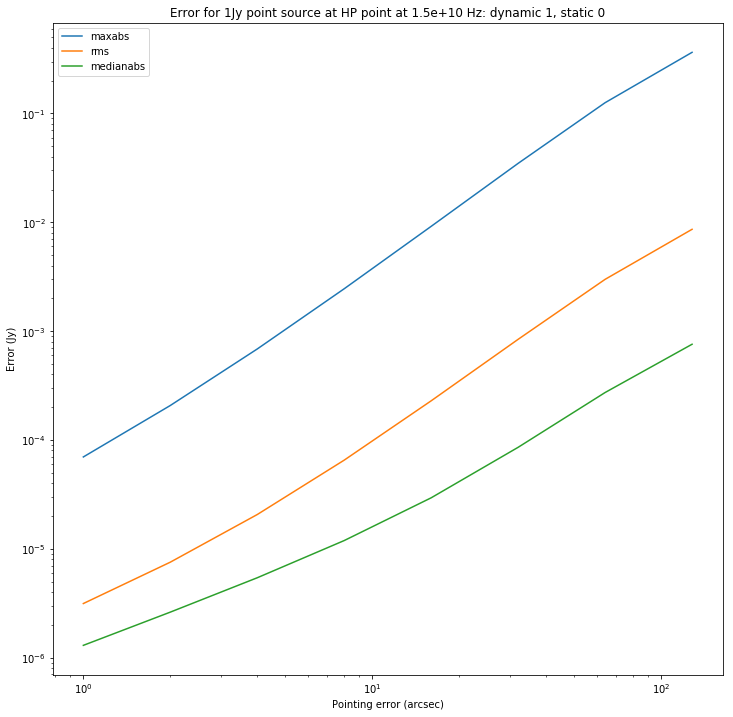

In [11]:
plt.clf()
for field in ['maxabs', 'rms', 'medianabs']:
    plt.loglog(pes, [q.data[field] for q in qas], '-', label=field)
plt.xlabel('Pointing error (arcsec)')
plt.ylabel('Error (Jy)')
plt.title('Error for 1Jy point source at HP point at %g Hz: dynamic %g, static %g' % 
          (frequency[0], dynamic, static))
plt.legend()
plt.show()